In [8]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0673f56a-2a26-47a5-94ef-4f54ad8c0ec2',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-10-19T16:48:02.121Z', 'error_code': 0, 'error_message': None, 'elapsed': 44, 'credit_count': 1, 'notice': None, 'total_count': 9881}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11779, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [14]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')

In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11779,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.976990e+07,1.976990e+07,False,NaN,1,NaN,NaN,None,2024-10-19T16:46:00.000Z,68107.928146,1.891966e+10,-48.7951,-0.115908,-1.034282,7.850567,7.379356,15.661873,1.530786,1.346487e+12,57.5799,1.430266e+12,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
1,1027,Ethereum,ETH,ethereum,9431,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.203881e+08,1.203881e+08,True,NaN,2,NaN,NaN,None,2024-10-19T16:46:00.000Z,2642.259820,1.061241e+10,-35.3420,-0.020395,-0.182031,6.723466,6.809525,2.435880,-24.415864,3.180967e+11,13.6043,3.180967e+11,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
2,825,Tether USDt,USDT,tether,100738,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.201040e+11,1.213629e+11,True,NaN,3,NaN,NaN,None,2024-10-19T16:46:00.000Z,0.999966,3.751683e+10,-37.5367,-0.000175,0.015408,0.010123,-0.020953,-0.003909,-0.052474,1.200999e+11,5.1363,1.213589e+11,None,2024-10-19T16:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-19 09:57:46.980098
3,1839,BNB,BNB,bnb,2263,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459316e+08,1.459316e+08,False,NaN,4,NaN,NaN,None,2024-10-19T16:46:00.000Z,596.582776,1.467433e+09,-13.2284,-0.108865,-0.745750,3.491834,4.675166,5.673411,-0.478342,8.706026e+10,3.7230,8.706026e+10,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.699333e+08,5.868549e+08,True,NaN,5,NaN,NaN,None,2024-10-19T16:46:00.000Z,156.626706,1.370678e+09,-29.1205,0.322015,0.923539,6.759792,8.964087,9.716458,-10.586311,7.360410e+10,3.1478,9.191716e+10,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
5,3408,USDC,USDC,usd-coin,22558,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.499042e+10,3.499042e+10,False,NaN,6,NaN,NaN,None,2024-10-19T16:46:00.000Z,0.999924,3.419233e+09,-39.8261,-0.002399,0.009801,-0.009368,-0.001466,0.007525,-0.011475,3.498776e+10,1.4962,3.498776e+10,None,2024-10-19T16:46:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-19 09:57:46.980098
6,52,XRP,XRP,xrp,1407,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.670644e+10,9.998712e+10,False,NaN,7,NaN,NaN,None,2024-10-19T16:46:00.000Z,0.544001,6.472570e+08,-41.8344,-0.108378,-0.337188,0.803376,-8.084946,-8.660265,-7.527333,3.084838e+10,1.3193,5.440015e+10,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
7,74,Dogecoin,DOGE,dogecoin,1083,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.464338e+11,1.464338e+11,True,NaN,8,NaN,NaN,None,2024-10-19T16:46:00.000Z,0.142886,1.986766e+09,-15.5915,-0.488276,2.021690,28.365646,34.120678,38.616961,9.412398,2.092331e+10,0.8947,2.092331e+10,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
8,1958,TRON,TRX,tron,1054,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,8.651883e+10,8

In [31]:
def api_runner():

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0673f56a-2a26-47a5-94ef-4f54ad8c0ec2',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df = pd.json_normalize(data['data'])
    df['timestamp']= pd.to_datetime('now')

    if not os.path.isfile(r'C:\Users\PRINCE\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\PRINCE\Documents\Python Scripts\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\PRINCE\Documents\Python Scripts\API.csv', mode = 'a', header = False)

In [35]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API RUNNER COMPLETED')
    sleep(60)
exit()

API RUNNER COMPLETED
API RUNNER COMPLETED
API RUNNER COMPLETED
API RUNNER COMPLETED
API RUNNER COMPLETED
API RUNNER COMPLETED
API RUNNER COMPLETED
API RUNNER COMPLETED
API RUNNER COMPLETED
API RUNNER COMPLETED
API RUNNER COMPLETED


KeyboardInterrupt: 

In [37]:
df2 = pd.read_csv(r'C:\Users\PRINCE\Documents\Python Scripts\API.csv')
df2

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11779,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.976992e+07,1.976992e+07,False,NaN,1,NaN,NaN,NaN,2024-10-19T17:22:00.000Z,68095.522610,1.815417e+10,-50.9544,-0.095674,-1.003756,7.718680,7.324702,15.980010,0.996190,1.346243e+12,57.6128,1.430006e+12,NaN,2024-10-19T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:24:28.110966
1,1,1027,Ethereum,ETH,ethereum,9431,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.203881e+08,1.203881e+08,True,NaN,2,NaN,NaN,NaN,2024-10-19T17:22:00.000Z,2641.407325,1.030716e+10,-37.7224,-0.065892,-0.312632,6.684173,7.215398,2.579547,-24.749047,3.179941e+11,13.6126,3.179941e+11,NaN,2024-10-19T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:24:28.110966
2,2,825,Tether USDt,USDT,tether,100738,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.201040e+11,1.213629e+11,True,NaN,3,NaN,NaN,NaN,2024-10-19T17:22:00.000Z,0.999897,3.648827e+10,-39.5077,-0.006814,-0.000109,0.014234,-0.033923,-0.025973,-0.063149,1.200916e+11,5.1400,1.213504e+11,NaN,2024-10-19T17:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-19 10:24:28.110966
3,3,1839,BNB,BNB,bnb,2263,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459316e+08,1.459316e+08,False,NaN,4,NaN,NaN,NaN,2024-10-19T17:22:00.000Z,596.774092,1.461811e+09,-13.4129,0.030719,-0.789290,3.429736,4.814217,6.107426,-0.551883,8.708818e+10,3.7270,8.708818e+10,NaN,2024-10-19T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:24:28.110966
4,4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.699330e+08,5.868547e+08,True,NaN,5,NaN,NaN,NaN,2024-10-19T17:22:00.000Z,156.032722,1.340867e+09,-30.6779,-0.134636,0.193570,6.337347,8.898932,9.160650,-11.567675,7.332492e+10,3.1380,9.156853e+10,NaN,2024-10-19T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:24:28.110966
5,5,3408,USDC,USDC,usd-coin,22558,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.499036e+10,3.499036e+10,False,NaN,6,NaN,NaN,NaN,2024-10-19T17:22:00.000Z,0.999852,3.326250e+09,-41.5767,0.002409,-0.009079,-0.004412,-0.020984,-0.009982,-0.016426,3.498519e+10,1.4972,3.498519e+10,NaN,2024-10-19T17:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-19 10:24:28.110966
6,6,52,XRP,XRP,xrp,1407,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.670644e+10,9.998712e+10,False,NaN,7,NaN,NaN,NaN,2024-10-19T17:22:00.000Z,0.542272,6.435618e+08,-42.3926,-0.311816,-1.002329,0.643718,-8.322836,-9.166138,-7.960698,3.075032e+10,1.3161,5.422720e+10,NaN,2024-10-19T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:24:28.110966
7,7,74,Dogecoin,DOGE,dogecoin,1083,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.464342e+11,1.464342e+11,True,NaN,8,NaN,NaN,NaN,2024-10-19T17:22:00.000Z,0.141914,1.914015e+09,-21.2807,-1.297863,1.908170,27.098137,33.924180,37.789608,8.184792,2.078105e+10,0.8893,2.078105e+10,NaN,2024-10-19T17:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 10:24:28.110966
8,8,1958,TRON,TRX,tron,1054,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN

In [39]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)

In [41]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11779,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00,19769896.00,19769896.00,False,NaN,1,NaN,NaN,None,2024-10-19T16:46:00.000Z,68107.93,18919655207.46,-48.80,-0.12,-1.03,7.85,7.38,15.66,1.53,1346486656213.15,57.58,1430266491056.71,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
1,1027,Ethereum,ETH,ethereum,9431,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120388140.92,120388140.92,True,NaN,2,NaN,NaN,None,2024-10-19T16:46:00.000Z,2642.26,10612412061.50,-35.34,-0.02,-0.18,6.72,6.81,2.44,-24.42,318096747523.12,13.60,318096747523.12,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
2,825,Tether USDt,USDT,tether,100738,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,120103979667.94,121362937380.47,True,NaN,3,NaN,NaN,None,2024-10-19T16:46:00.000Z,1.00,37516830893.64,-37.54,-0.00,0.02,0.01,-0.02,-0.00,-0.05,120099941088.81,5.14,121358856468.01,None,2024-10-19T16:46:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-10-19 09:57:46.980098
3,1839,BNB,BNB,bnb,2263,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145931568.73,145931568.73,False,NaN,4,NaN,NaN,None,2024-10-19T16:46:00.000Z,596.58,1467433379.11,-13.23,-0.11,-0.75,3.49,4.68,5.67,-0.48,87060260394.50,3.72,87060260394.50,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
4,5426,Solana,SOL,solana,767,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,469933290.32,586854938.74,True,NaN,5,NaN,NaN,None,2024-10-19T16:46:00.000Z,156.63,1370678099.67,-29.12,0.32,0.92,6.76,8.96,9.72,-10.59,73604103196.03,3.15,91917155822.28,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
5,3408,USDC,USDC,usd-coin,22558,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34990416577.35,34990416577.35,False,NaN,6,NaN,NaN,None,2024-10-19T16:46:00.000Z,1.00,3419233434.72,-39.83,-0.00,0.01,-0.01,-0.00,0.01,-0.01,34987756590.56,1.50,34987756590.56,None,2024-10-19T16:46:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-10-19 09:57:46.980098
6,52,XRP,XRP,xrp,1407,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00,56706436160.00,99987115141.00,False,NaN,7,NaN,NaN,None,2024-10-19T16:46:00.000Z,0.54,647256977.63,-41.83,-0.11,-0.34,0.80,-8.08,-8.66,-7.53,30848383818.46,1.32,54400145569.75,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
7,74,Dogecoin,DOGE,dogecoin,1083,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,146433836383.71,146433836383.71,True,NaN,8,NaN,NaN,None,2024-10-19T16:46:00.000Z,0.14,1986765917.51,-15.59,-0.49,2.02,28.37,34.12,38.62,9.41,20923309466.70,0.89,20923309466.70,None,2024-10-19T16:46:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-10-19 09:57:46.980098
8,1958,TRON,TRX,tron,1054,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,86518830554.53,86518886925.53,True,NaN,9,71659659264.00,11269492710.56,None,2024-10-19T16:46:00.000Z,0.16,241237855.95,-8.38,-0.40,-1.23,-3.50,3.85,4.36,16.78,13606307094.87,0.58,13606315960.01,None

In [47]:
df3= df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()

In [49]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.12,-1.03,7.85,7.38,15.66,1.53
Ethereum,-0.02,-0.18,6.72,6.81,2.44,-24.42
Tether USDt,-0.00,0.02,0.01,-0.02,-0.00,-0.05
BNB,-0.11,-0.75,3.49,4.68,5.67,-0.48
Solana,0.32,0.92,6.76,8.96,9.72,-10.59
USDC,-0.00,0.01,-0.01,-0.00,0.01,-0.01
XRP,-0.11,-0.34,0.80,-8.08,-8.66,-7.53
Dogecoin,-0.49,2.02,28.37,34.12,38.62,9.41
TRON,-0.40,-1.23,-3.50,3.85,4.36,16.78


In [53]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.12
              quote.USD.percent_change_24h    -1.03
              quote.USD.percent_change_7d      7.85
              quote.USD.percent_change_30d     7.38
              quote.USD.percent_change_60d    15.66
              quote.USD.percent_change_90d     1.53
Ethereum      quote.USD.percent_change_1h     -0.02
              quote.USD.percent_change_24h    -0.18
              quote.USD.percent_change_7d      6.72
              quote.USD.percent_change_30d     6.81
              quote.USD.percent_change_60d     2.44
              quote.USD.percent_change_90d   -24.42
Tether USDt   quote.USD.percent_change_1h     -0.00
              quote.USD.percent_change_24h     0.02
              quote.USD.percent_change_7d      0.01
              quote.USD.percent_change_30d    -0.02
              quote.USD.percent_change_60d    -0.00
              quote.USD.percent_change_90d    -0.05
BNB           quote.U

In [55]:
type(df4)

pandas.core.series.Series

In [57]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                             
Bitcoin      quote.USD.percent_change_1h    -0.12
             quote.USD.percent_change_24h   -1.03
             quote.USD.percent_change_7d     7.85
             quote.USD.percent_change_30d    7.38
             quote.USD.percent_change_60d   15.66
             quote.USD.percent_change_90d    1.53
Ethereum     quote.USD.percent_change_1h    -0.02
             quote.USD.percent_change_24h   -0.18
             quote.USD.percent_change_7d     6.72
             quote.USD.percent_change_30d    6.81
             quote.USD.percent_change_60d    2.44
             quote.USD.percent_change_90d  -24.42
Tether USDt  quote.USD.percent_change_1h    -0.00
             quote.USD.percent_change_24h    0.02
             quote.USD.percent_change_7d     0.01
             quote.USD.percent_change_30d   -0.02
             quote.USD.percent_change_60d   -0.00
             quote.USD.percent_change_90d   -0.05
BNB          quote.USD.percent_change_1h    -0.11
             quote.USD.percent_change_24h   -0.75
             quote.USD.percent_change_7d     3.49
             quote.USD.percent_change_30d    4.68
             quote.USD.percent_change_60d    5.67
             quote.USD.percent_change_90d   -0.48
Solana       quote.USD.percent_change_1h     0.32
             quote.USD.percent_change_24h    0.92
             quote.USD.percent_change_7d     6.76
             quote.USD.percent_change_30d    8.96
             quote.USD.percent_change_60d    9.72
             quote.USD.percent_change_90d  -10.59
USDC         quote.USD.percent_change_1h    -0.00
             quote.USD.percent_change_24h    0.01
             quote.USD.percent_change_7d    -0.01
             quote.USD.percent_change_30d   -0.00
             quote.USD.percent_change_60d    0.01
             quote.USD.percent_change_90d   -0.01
XRP          quote.USD.percent_change_1h    -0.11
             quote.USD.percent_change_24h   -0.34
             quote.USD.percent_change_7d     0.80
             quote.USD.percent_change_30d   -8.08
             quote.USD.percent_change_60d   -8.66
             quote.USD.percent_change_90d   -7.53
Dogecoin     quote.USD.percent_change_1h    -0.49
             quote.USD.percent_change_24h    2.02
             quote.USD.percent_change_7d    28.37
             quote.USD.percent_change_30d   34.12
             quote.USD.percent_change_60d   38.62
             quote.USD.percent_change_90d    9.41
TRON         quote.USD.percent_change_1h    -0.40
             quote.USD.percent_change_24h   -1.23
             quote.USD.percent_change_7d    -3.50
             quote.USD.percent_change_30d    3.85
             quote.USD.percent_change_60d    4.36
             quote.USD.percent_change_90d   16.78
Toncoin      quote.USD.percent_change_1h    -0.10
             quote.USD.percent_change_24h   -0.08
             quote.USD.percent_change_7d    -1.03
             quote.USD.percent_change_30d   -9.20
             quote.USD.percent_change_60d  -21.12
             quote.USD.percent_change_90d  -26.65
Cardano      quote.USD.percent_change_1h    -0.22
             quote.USD.percent_change_24h    0.03
             quote.USD.percent_change_7d    -1.01
             quote.USD.percent_change_30d   -1.13
             quote.USD.percent_change_60d    2.94
             quote.USD.percent_change_90d  -18.36
Avalanche    quote.USD.percent_change_1h    -0.21
             quote.USD.percent_change_24h    0.77
             quote.USD.percent_change_7d    -3.76
             quote.USD.percent_change_30d    5.88
             quote.USD.percent_change_60d   27.68
             quote.USD.percent_change_90d   -9.82
Shiba Inu    quote.USD.percent_change_1h    -0.28
             quote.USD.percent_change_24h   -0.23
             quote.USD.percent_change_7d     5.63
             quote.USD.percent_change_30d   30.95
             quote.USD.percent_change_60d   38.06
             quote.USD.percent_change_90d    6.35
Bitcoin Cash quote.USD.percent_change_1h   

In [59]:
type(df5)

pandas.core.frame.DataFrame

In [61]:
df5.count()

values    90
dtype: int64

In [65]:
index = pd.Index(range(90))

df6 = df5.set_index(index)
df6

,values
0,-0.12
1,-1.03
2,7.85
3,7.38
4,15.66
5,1.53
6,-0.02
7,-0.18
8,6.72
9,6.81


In [67]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12
1,Bitcoin,quote.USD.percent_change_24h,-1.03
2,Bitcoin,quote.USD.percent_change_7d,7.85
3,Bitcoin,quote.USD.percent_change_30d,7.38
4,Bitcoin,quote.USD.percent_change_60d,15.66
5,Bitcoin,quote.USD.percent_change_90d,1.53
6,Ethereum,quote.USD.percent_change_1h,-0.02
7,Ethereum,quote.USD.percent_change_24h,-0.18
8,Ethereum,quote.USD.percent_change_7d,6.72
9,Ethereum,quote.USD.percent_change_30d,6.81


In [85]:
df7 = df6.rename(columns = {'level_1': 'percent_change'})

In [87]:
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.12
1,Bitcoin,quote.USD.percent_change_24h,-1.03
2,Bitcoin,quote.USD.percent_change_7d,7.85
3,Bitcoin,quote.USD.percent_change_30d,7.38
4,Bitcoin,quote.USD.percent_change_60d,15.66
5,Bitcoin,quote.USD.percent_change_90d,1.53
6,Ethereum,quote.USD.percent_change_1h,-0.02
7,Ethereum,quote.USD.percent_change_24h,-0.18
8,Ethereum,quote.USD.percent_change_7d,6.72
9,Ethereum,quote.USD.percent_change_30d,6.81


In [89]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.12
1,Bitcoin,24h,-1.03
2,Bitcoin,7d,7.85
3,Bitcoin,30d,7.38
4,Bitcoin,60d,15.66
5,Bitcoin,90d,1.53
6,Ethereum,1h,-0.02
7,Ethereum,24h,-0.18
8,Ethereum,7d,6.72
9,Ethereum,30d,6.81


In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

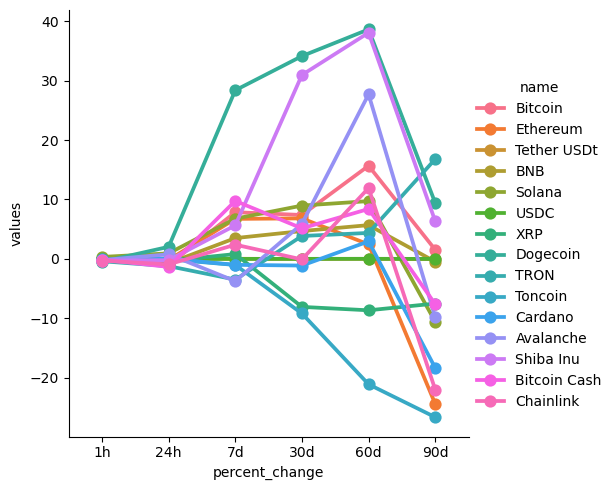

In [93]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [101]:
df9 = df2[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,68095.52,2024-10-19 10:24:28.110966
15,Bitcoin,68090.07,2024-10-19 10:26:54.573380
30,Bitcoin,68087.60,2024-10-19 10:28:01.274879
45,Bitcoin,68100.67,2024-10-19 10:29:05.066930
60,Bitcoin,68102.84,2024-10-19 10:30:11.745499
75,Bitcoin,68105.45,2024-10-19 10:31:14.503433
90,Bitcoin,68105.45,2024-10-19 10:32:17.145736
105,Bitcoin,68119.32,2024-10-19 10:33:19.949487
120,Bitcoin,68119.00,2024-10-19 10:34:23.128516
135,Bitcoin,68132.00,2024-10-19 10:35:25.895036


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

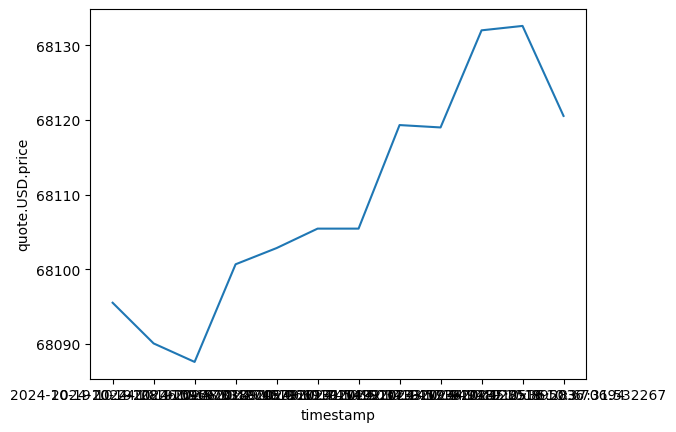

In [103]:
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df9)